In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Phân tích cú pháp: Bài tập về nhà 


#### Mở rộng bài tập 2 của bài trên lớp:

-	Bổ sung các trường hợp bắt lỗi của Subject-Verb

-	Sửa các hàm nếu cần thiết


Bài 2: Chương trình minh hoạ kiểm lỗi cú pháp tiếng Anh đơn giản 

    1) Cài đặt

    a) Cài đặt thư viện Stanford NLPCore  

    b) Import bộ phân tích cú pháp CoreNLPParser 

    2)  Phân tích cú pháp cho câu và khảo sát cây cú pháp

    a) Gọi phân tích cú pháp

    b) View cây 

    3) Qui tắc kiểm lỗi cú pháp

    -	Ví dụ về Qui tắc agreement giữa Subject – Verb

    -	Kiểm lỗi và đưa ra loại lỗi 


In [ ]:
!pip install svgling

In [ ]:
import os
from nltk.parse.corenlp import CoreNLPServer
#Setpath

#Set up môi trường cho corenlp đường dẫn bên dưới đến thư mục "stanford-corenlp-4.2.0"
from nltk.parse.corenlp import CoreNLPServer
STANFORD = os.path.join("/content/drive/MyDrive/NLP/Đáp án cho bài tập thực hành/Lesson5", "stanford-corenlp-4.2.2")
print(STANFORD)
#  Giải nén và loadmodel
model = CoreNLPServer(
   os.path.join(STANFORD, "stanford-corenlp-4.2.2.jar"),
   os.path.join(STANFORD, "stanford-corenlp-4.2.2-models.jar"), 
   verbose=True,
)

/content/drive/MyDrive/NLP/Đáp án cho bài tập thực hành/Lesson5/stanford-corenlp-4.2.2


In [ ]:
%cd /content/drive/MyDrive/NLP/Đáp án cho bài tập thực hành/Lesson5/stanford-corenlp-4.2.2
!nohup java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 15000 > core-server.log&

/content/drive/MyDrive/NLP/Đáp án cho bài tập thực hành/Lesson5/stanford-corenlp-4.2.2
nohup: redirecting stderr to stdout


                        ROOT                         
                         |                            
                         S                           
         ________________|_________________________   
        |                         VP               | 
        |                 ________|___             |  
        NP               |            NP           | 
  ______|________        |     _______|______      |  
PRP$    JJ       NN     VBD   DT      JJ     NN    . 
 |      |        |       |    |       |      |     |  
 my  english instructor were  a      good teacher  . 



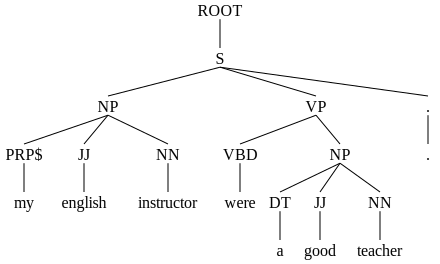

In [ ]:
from nltk.tree import Tree
from nltk.parse.corenlp import CoreNLPParser

import matplotlib
matplotlib.use('Agg')
# Khởi tạo cây và phân tích 
def parse_processing(string):

    ##BEGIN CODE HERE:
    #Tạo parse tree
    parser = CoreNLPParser(url='http://localhost:9001')
    parse = next(parser.raw_parse(string))
    
    #Định dạng kiểu cho parse tree
    tree = Tree.fromstring(str(parse), 
               read_node=lambda s: "%s" % s, # xuất node
               read_leaf=lambda s: "%s" % s.lower()) # xuất lá
    return tree
    ##END CODE HERE:

string = "My English Instructor were a good teacher."
tree = parse_processing(string)
tree.pretty_print()
tree

In [ ]:
print(tree.leaves())
for child in tree:
    print(child.label())

['my', 'english', 'instructor', 'were', 'a', 'good', 'teacher', '.']
S


In [ ]:
from nltk.parse.corenlp import CoreNLPDependencyParser

# Phân tích Dependency Parsing 
string = 'I have booked a very nice hotel.'
##BEGIN CODE HERE: 
parser = CoreNLPDependencyParser(url='http://localhost:9001')
parse = next(parser.raw_parse(string))
##END CODE HERE: 

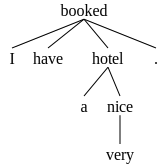

In [ ]:
parse.tree()

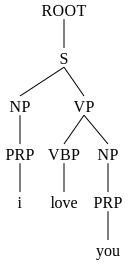

In [ ]:
#sent = 'she love a teacher very much '
#sent = 'actually her friend loves the teacher very much '
#sent = 'she loves'
#sent = 'actually she loves the teacher very much '
#sent = 'she want to teach this lecture'
sent = 'I love you'
def parse(sent):
    sent = sent.lower()
    tree = parse_processing(sent)
    return tree

tree = parse(sent)
tree

In [ ]:
#Viết hàm lấy cây con có nhãn NP và VP
def getNP_VP(tree):
    ##START CODE HERE:
    NP=0
    VP=0
    for i in range(len(tree[0])):
        if tree[0][i].label()=='NP':
            NP = tree[0][i]
        if NP!=0 and tree[0][i].label()=='VP':
            VP = tree[0][i]
    ##END CODE HERE:
    return NP,VP
    

In [ ]:
NP,VP = getNP_VP(tree)
if(NP!=0): 
    NP.pretty_print()
if(VP!=0):
    VP.pretty_print()

 NP
 |  
PRP
 |  
 i 

      VP    
  ____|___   
 |        NP
 |        |  
VBP      PRP
 |        |  
love     you



In [ ]:
a = tree.subtrees()
for i in a:
    print(i.label())

ROOT
S
NP
PRP
VP
VBP
NP
PRP


In [ ]:
# xác định ngôi của chủ ngữ
'''
1:  Ngôi thứ nhất số ít: I
2:  Ngôi thứ nhất số nhiều: we
3:  Ngôi thứ 2: you 
4:  Ngôi thứ 3 số ít: he, she, it
5:  Ngôi thứ 3 số nhiều: they 
-1: không xác định (cấu trúc câu không có chủ ngữ)
'''

# xác định theo danh từ 
def get_NP_type(node):
    subnodes = node.subtrees()
    labels = [n.label() for n in subnodes]
    if 'NN' in labels:
        return 10 # singular
    elif 'NNS' in labels:
        return 11 # plural
    return -1

# xác định theo đại từ (pronoun)
def get_Pronoun_type(node):
    words = node.leaves()
    if 'i' in words:
        return 1
    elif 'we' in words:
        return 2
    elif 'you' in words:
        return 3
    elif len(set(words).intersection(['he','she','it']))>0:
        return 4
    elif 'they' in words:
        return 5
    else:
        return -1
    
print(get_Pronoun_type(NP))

1


In [ ]:
# lấy type của verb
'''
1: VB: Verb, base form
2: VBP: Verb, non-3rd person singular present
3: VBZ: Verb, 3rd person singular present
4: VBD: Verb, past tense
5: VBG: Verb, gerund or present participle
6: VBN: Verb, past participle
'''
Verb_dict={'VB':1, 'VBP':2,'VBZ':3,'VBD':4,'VBG':5,'VBN':6}
def get_verb_type(node):
    for sub in node.subtrees():
        k = sub.label()
        if k in Verb_dict.keys():
            return Verb_dict[k]
    return -1

In [ ]:
VP.pretty_print()
get_verb_type(VP)

      VP    
  ____|___   
 |        NP
 |        |  
VBP      PRP
 |        |  
love     you



2

In [ ]:
# xác định nguyên tắc lỗi
'''
NP:4 -> VP:3
'''
# bổ sung thêm các luật gây ra lỗi matching giữa Subject và VP ở đây
match={1:[2],4:[3],10:[3],11:[2]}
def check_grammar(sent):
    tree = parse(sent)
    NP,VP = getNP_VP(tree)
    if NP==0 or VP==0:
        return 'no idea'
    n = get_Pronoun_type(NP)
    if n==-1:
        n = get_NP_type(NP)
        
    v = get_verb_type(VP) 
    if n in match.keys():
        if not v in match[n]:
            return 'error'
    return 'ok'

In [ ]:
#sent = 'she want to go to school'
#sent = 'actualy I now wants to go to school'
sent = 'he is playing football now'
tree = parse(sent)
tree.pretty_print()
print(get_Pronoun_type(tree[0]))
print(get_NP_type(tree[0]))

check_grammar(sent)

          ROOT                   
           |                      
           S                     
  _________|_____                 
 |               VP              
 |    ___________|_____           
 |   |                 VP        
 |   |      ___________|______    
 NP  |     |           NP    ADVP
 |   |     |           |      |   
PRP VBZ   VBG          NN     RB 
 |   |     |           |      |   
 he  is playing     football now 

          ROOT                   
           |                      
           S                     
  _________|_____                 
 |               VP              
 |    ___________|_____           
 |   |                 VP        
 |   |      ___________|______    
 NP  |     |           NP    ADVP
 |   |     |           |      |   
PRP VBZ   VBG          NN     RB 
 |   |     |           |      |   
 he  is playing     football now 

4
10
          ROOT                   
           |                      
           S                

'ok'

#Tiến hành xây dựng kiểm tra lỗi chính tả giữa chia động từ ở các thì cơ bản#

In [ ]:
# Xác định các đại từ chỉ thời gian ở các thì cơ bản
'''
Simple present tense: Every day/ week/ month;
Present continuous tense: Now, At the moment, At present;
Past simple tense: Yesterday, Last night/month/year;
'''
tense_to_time = {
    'simple_present_tense': ['every day','every week','every month'],
    'present_continuous_tense': ['now','at the moment','at present'],
    'past_simple_tense': ['yesterday','last night','last day', 'last month', 'last year', 'ago']
}

tense_list = [
    'simple_present_tense',
    'present_continuous_tense',
    'past_simple_tense'
]

# Kiểm tra thì của câu bằng cách sử dụng các đại từ chỉ thời gian ở trên
def get_tense(text):

    ##START CODE HERE:
    for key in tense_to_time.keys():
        for time in tense_to_time[key]:
            if text.lower().find(time) != -1:
                return key
    return None
    ##END CODE HERE:        

#Maping luật giữa Thì và các loại động từ
tense_to_Verb = {
    'simple_present_tense': [['VBP'],['VBZ']],
    'present_continuous_tense': [['VBP','VBG'],['VBZ','VBG']],
    'past_simple_tense': [['VBD'],['VBD']]
}

# lấy loại động từ từ tree
'''
1: VB: Verb, base form
2: VBP: Verb, non-3rd person singular present
3: VBZ: Verb, 3rd person singular present
4: VBD: Verb, past tense
5: VBG: Verb, gerund or present participle
'''

Verb_lisst=['VB', 'VBP','VBZ','VBD','VBG']
#Lấy danh sách sách các loại động từ có trong cây
def get_verb_type(node):
    lst_verb_type = []
    for sub in node.subtrees():
        k = sub.label()
        if k in Verb_lisst:
            lst_verb_type.append(k)
    return lst_verb_type

#Định nghĩa các loại đại từ
def get_Pronoun_type(node):
    words = node.leaves()
    if 'i' in words:
        return 0
    elif 'we' in words:
        return 0
    elif 'you' in words:
        return 0
    elif len(set(words).intersection(['he','she','it']))>0:
        return 1
    elif 'they' in words:
        return 0
    else:
        return -1

#Xây dựng hàm kiểm tra chia động từ
def check_grammar1(sent):
    ## START CODE HERE:
    #Kiểm tra thì của câu
    tense = get_tense(sent)
    if tense == None:
        return 'No Idea'
    #Phân tích cú pháp
    tree = parse(sent)
    NP,VP = getNP_VP(tree)
    if NP==0 or VP==0:
        return 'No Idea'
    n = get_Pronoun_type(NP)
    if n==-1:
        return 'No Idea'

    lst_verb_type = get_verb_type(VP)
    if len(lst_verb_type) == 0:
        return 'No Idea'

    if set(lst_verb_type) == set(tense_to_Verb[tense][n]):
        return 'True'
    else:
        return "Error"
    ## END CODE HERE:

In [ ]:
sent = 'He get up early every day'
check_grammar1(sent)

        ROOT                 
         |                    
         S                   
  _______|_____               
 |             VP            
 |    _________|_____         
 NP  |  PRT        NP-TMP    
 |   |   |      _____|_____   
PRP  VB  RP    RB    DT    NN
 |   |   |     |     |     |  
 he get  up  early every  day



'Error'

In [ ]:
sent = 'He goes to school every day'
check_grammar1(sent)

         ROOT                            
          |                               
          S                              
  ________|_________                      
 |                  VP                   
 |    ______________|____________         
 |   |         PP                |       
 |   |     ____|____             |        
 NP  |    |         NP         NP-TMP    
 |   |    |         |       _____|_____   
PRP VBZ   IN        NN     DT          NN
 |   |    |         |      |           |  
 he goes  to      school every        day



'True'

In [ ]:
sent = 'He went to the “Trang Quynh” movie with my boyfriend 3 days ago'
check_grammar1(sent)

             ROOT                                                                   
              |                                                                      
              S                                                                     
  ____________|____________________                                                  
 |                                 VP                                               
 |    _____________________________|_________________________________________        
 |   |                  PP                        |                          |      
 |   |     _____________|_____                    |                          |       
 |   |    |                   NP                  PP                        ADVP    
 |   |    |              _____|_________      ____|____                   ___|____   
 NP  |    |             NP              NP   |         NP                NP       | 
 |   |    |    _________|__________     |    |     ____|____

'True'